# OCT2017 DATASET


### Data Stucture 
Exploring the data

In [ ]:
# %pip install torch torchvision
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install pillow
# %pip install tqdm
# %pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# number of images per class, training set is imbalanced
import os

dataset_path = os.path.join(os.getcwd(), "OCT2017")
import pandas as pd

def count_images(split):
    path = os.path.join(dataset_path, split)
    class_counts = {}
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        if os.path.isdir(label_path):
            class_counts[label] = len(os.listdir(label_path))
    return class_counts


train_counts = count_images('train')
test_counts = count_images('test')

train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test Count'])
summary_df = pd.merge(train_df, test_df, on='Class')
summary_df

,Class,Train Count,Test Count
0,NORMAL,23684,250
1,DME,10214,250
2,DRUSEN,7755,250
3,CNV,33485,250


### Summary Statistics Interpretation

#### Train Set:
- The training set contains 4 classes: CNV, DME, DRUSEN, and NORMAL.
- The `mean` number of samples per class is approximately **20,871**, but the `std` (standard deviation) is quite high at **13,382**, telling us theres a significant **class imbalance**.
- The **smallest class**, DRUSEN, has **8,616** images, while the **largest class**, CNV, has **37,205**.
- This imbalance could negatively affect model performance, especially for underrepresented classes.

#### Test Set:
- The test set is **perfectly balanced**, with each class containing exactly **250 samples**.
- `std = 0` confirms there is **no variation** in sample counts across classes.
- A balanced test set is good for evaluating model performance fairly across all classes.

#### Conclusion:
- Special care should be taken during training to handle the imbalance in the training set, possibly through **data augmentation**, **class weighting**, or **resampling techniques**.

In [17]:
print("Train Set Summary Statistics:")
print(train_df.describe())

print("Test Set Summary Statistics:")
print(test_df.describe())

Train Set Summary Statistics:
        Train Count
count      4.000000
mean   18784.500000
std    12044.544284
min     7755.000000
25%     9599.250000
50%    16949.000000
75%    26134.250000
max    33485.000000
Test Set Summary Statistics:
       Test Count
count         4.0
mean        250.0
std           0.0
min         250.0
25%         250.0
50%         250.0
75%         250.0
max         250.0


#### There are no missing values

In [18]:
import pandas as pd

# Check for missing values in summary_df
print("Missing values in summary table:")
print(summary_df.isnull().sum())


Missing values in summary table:
Class          0
Train Count    0
Test Count     0
dtype: int64


### Image Dimensions 
Height is consistent (496–512 px), which simplifies preprocessing.

Width varies significantly, from 384 px to 1536 px.

Most images have standard sizes around 512x496 (median), but outliers exist (wider images).

This variation in width may require resizing or cropping before feeding into models.

In [19]:
from PIL import Image
def get_image_sizes(split):
    sizes = []
    split_path = os.path.join(dataset_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for fname in os.listdir(cls_path):
            fpath = os.path.join(cls_path, fname)
            img = Image.open(fpath)
            sizes.append(img.size)
    return sizes

# Image sizes from both train and test sets
train_sizes = get_image_sizes('train')
test_sizes = get_image_sizes('test')
all_sizes = train_sizes + test_sizes

# Convert to DataFrame for summary
sizes_df = pd.DataFrame(all_sizes, columns=['Width', 'Height'])

# Display summary
print("Image size summary:")
print(sizes_df.describe())



Image size summary:
              Width        Height
count  76138.000000  76138.000000
mean     680.058630    498.920802
std      304.180654      6.180797
min      384.000000    496.000000
25%      512.000000    496.000000
50%      512.000000    496.000000
75%      768.000000    496.000000
max     1536.000000    512.000000


### No Duplicates

In [20]:
import os

def find_duplicate_filenames(folder_path):
    seen = []
    duplicates = []

    # Go through each class folder like CNV, DME.. 
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Skip anything that isn't a folder
        if not os.path.isdir(class_path):
            continue

        # Go through each image file
        for file_name in os.listdir(class_path):
            if file_name in seen:
                duplicates.append(file_name)
            else:
                seen.append(file_name)

    return duplicates


# Check both train and test folders
train_duplicates = find_duplicate_filenames(os.path.join(dataset_path, 'train'))
test_duplicates = find_duplicate_filenames(os.path.join(dataset_path, 'test'))

print("Number of duplicate filenames in train:", len(train_duplicates))
print("Number of duplicate filenames in test:", len(test_duplicates))


Number of duplicate filenames in train: 0
Number of duplicate filenames in test: 0


## Visualizations
- Bar graph shows how the test set is perfectly balanced but theres a imbalance in the training set.
- Significantly lower data in the training set for DME and DRUSEN

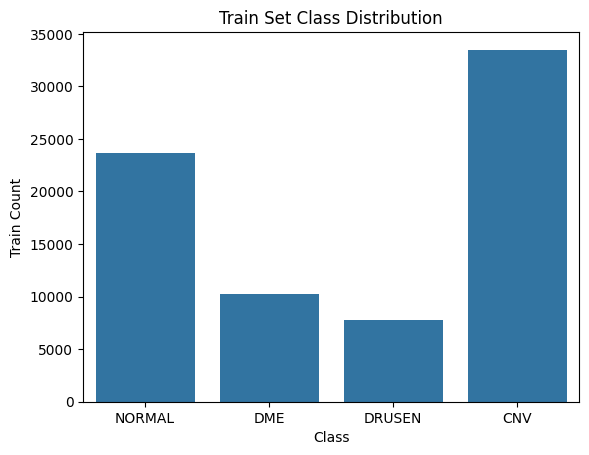

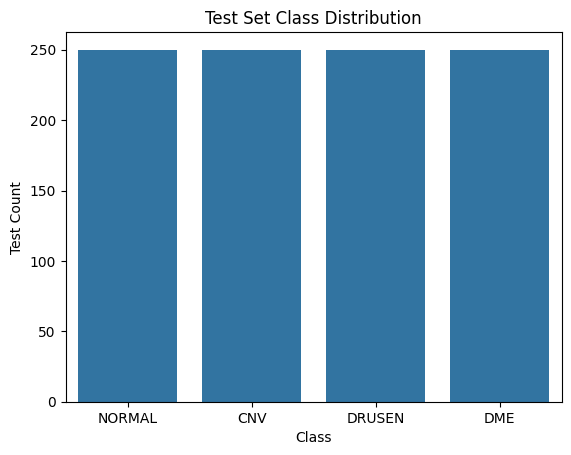

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=train_df, x='Class', y='Train Count')
plt.title('Train Set Class Distribution')
plt.show()

sns.barplot(data=test_df, x='Class', y='Test Count')
plt.title('Test Set Class Distribution')
plt.show()

Processing CNV: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33485/33485 [00:40<00:00, 822.14it/s]


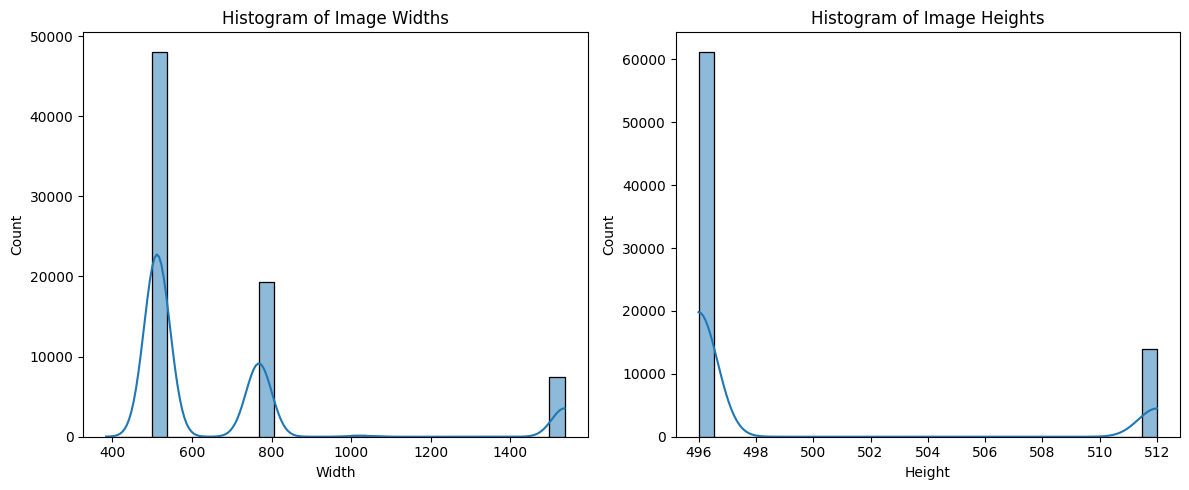

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
# Collect image dimensions (width, height)
image_shapes = []

train_path = os.path.join(dataset_path, 'train')


for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        for filename in tqdm(os.listdir(class_dir), desc=f"Processing {class_name}"):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    image_shapes.append((w, h))
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

# Create DataFrame for plotting
dim_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dim_df['Width'], kde=True, bins=30)
plt.title("Histogram of Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(dim_df['Height'], kde=True, bins=30)
plt.title("Histogram of Image Heights")

plt.tight_layout()
plt.show()


# Show 5 (random) images per class


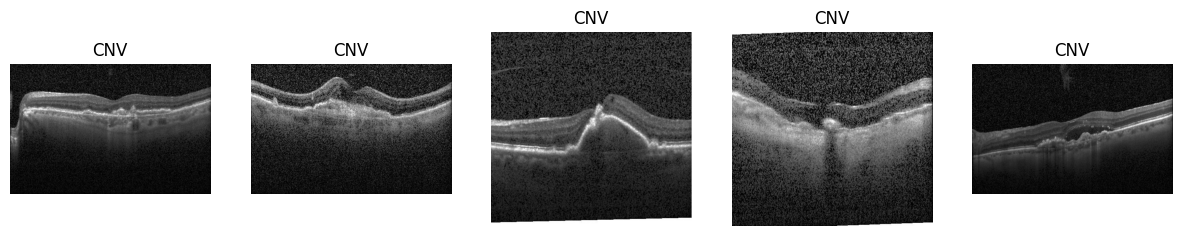

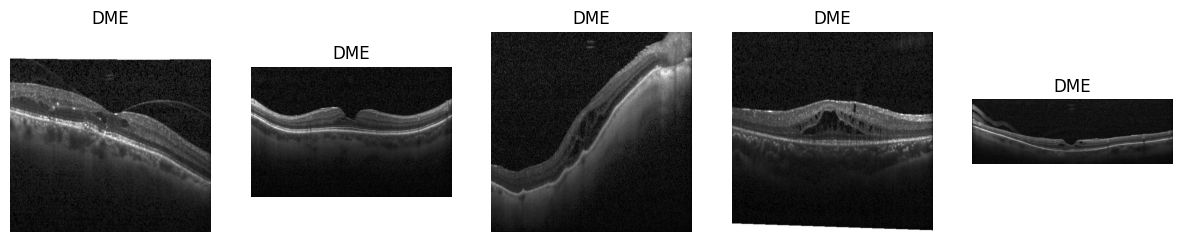

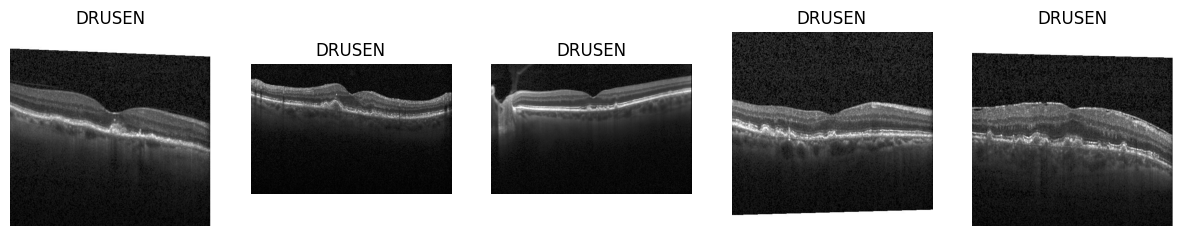

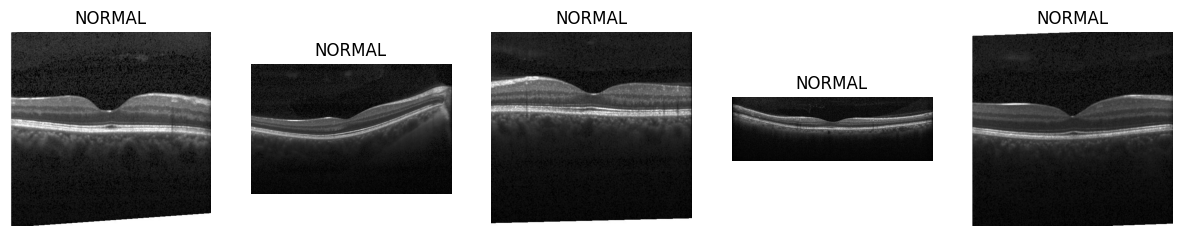

In [ ]:
import random
from PIL import Image

def show_samples(path, label, n=5):
    files = os.listdir(os.path.join(path, label))
    samples = random.sample(files, n)
    fig, axs = plt.subplots(1, n, figsize=(15, 4))
    for i, file in enumerate(samples):
        img = Image.open(os.path.join(path, label, file))
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(label)
    plt.show()

for label in os.listdir(os.path.join(dataset_path, 'train')):
    show_samples(os.path.join(dataset_path, 'train'), label)

### Train, Validation, and Test Split

After visualizing the dataset and confirming the class distribution, we split our data to prepare it for model training.

- We started with the original training folder (`OCT2017/train`), which contains about 80% of the total dataset.
- We used an **80/20 split** on this training data to create:
  - **Training Set (70%)**
  - **Validation Set (10%)**

This way, we ensure that:
- The **training set** is used to fit the model.
- The **validation set** is used to monitor model performance and tune hyperparameters.
- The **test set**, which was already provided (`OCT2017/test`), is already balanced across all classes.

We resized all the images to the same size and applied some basic transformations like flipping and rotating (for training images only). Then, we used PyTorch’s DataLoader to group the images into batches, which helps the model train faster and more efficiently.


In [ ]:
import os
import random
import shutil
from pathlib import Path

# Paths
base_path = os.path.join(os.getcwd(), 'OCT2017')
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')

# Create val directory
os.makedirs(val_dir, exist_ok=True)

random.seed(42) # same random results 

# Split each class folder
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)
    os.makedirs(class_val_path, exist_ok=True)

    # List all image files
    files = os.listdir(class_train_path)
    random.shuffle(files)

    # 10% for validation
    val_count = int(0.1 * len(files))
    val_files = files[:val_count]

    for file in val_files:
        src_path = os.path.join(class_train_path, file)
        dst_path = os.path.join(class_val_path, file)
        shutil.move(src_path, dst_path)

print(" val folder complete ")


 val folder complete 


### Image Resizing for VGG16 (224 x 224)

In this step, we resize all images in the dataset to **224x224 pixels**, which is the required input size for the **VGG16** model.

- We apply resizing to the `train`, `val`, and `test` folders.
- Resized images are saved to a new directory (`OCT2017_resized`) to preserve the original dataset.
- The folder structure (including class subfolders) is maintained in the resized dataset.
- Invalid or non-image files are safely skipped.
- This resizing prepares the dataset for input into standard pretrained CNN architectures.

**Note:** The original images remain unchanged. All resized images are saved separately to ensure safe preprocessing without data loss.


In [ ]:
from PIL import Image
import os

def resize_images(input_dir, output_dir, target_size=(224, 224)):
    os.makedirs(output_dir, exist_ok=True)

    for cls in os.listdir(input_dir):
        cls_input_path = os.path.join(input_dir, cls)
        cls_output_path = os.path.join(output_dir, cls)

        # Skip non-directories
        if not os.path.isdir(cls_input_path):
            continue

        os.makedirs(cls_output_path, exist_ok=True)

        for fname in os.listdir(cls_input_path):
            input_path = os.path.join(cls_input_path, fname)
            output_path = os.path.join(cls_output_path, fname)

            try:
                with Image.open(input_path) as img:
                    img = img.resize(target_size)
                    img.save(output_path)  # Save resized image in new location
            except Exception as e:
                print(f"Skipped {input_path}: {e}")

# Base dataset paths
original_dataset_path = os.path.join(os.getcwd(), 'OCT2017')
resized_dataset_path = os.path.join(os.getcwd(), 'OCT2017_resized')

# Resize train, val, and test sets into new directory
resize_images(os.path.join(original_dataset_path, 'train'), os.path.join(resized_dataset_path, 'train'))
resize_images(os.path.join(original_dataset_path, 'val'), os.path.join(resized_dataset_path, 'val'))
resize_images(os.path.join(original_dataset_path, 'test'), os.path.join(resized_dataset_path, 'test'))

print("All images resized to 224x224 and saved in 'OCT2017_resized'. Originals preserved.")


All images resized to 224x224 and saved in 'OCT2017_resized'. Originals preserved.


### Data Augmentation

We applied basic data augmentation techniques to the training set to improve generalization. This included:

- **Horizontal Flip:** Randomly flips images  
- **Rotation:** Applies slight random rotations (10 degrees)  
- **Normalization:** Rescales image pixel values to a standard range  

Validation and test sets are **only** resized and normalized.

To address the imbalance in the training set, we applied a **WeightedRandomSampler** during data loading. This ensures that each class is more equally represented across training batches, without altering the original dataset size or duplicating samples.


In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch
import os

# Base path for resized dataset
dataset_path = os.path.join(os.getcwd(), 'OCT2017_resized')

# Augmentation for training data only
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Basic transform for val and test
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Paths to resized folders
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')

# Datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_path, transform=base_transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=base_transform)

# --------------------------------------------
# Compute weights for each sample in train set
# --------------------------------------------
targets = train_dataset.targets  # list of class indices for each image
class_counts = torch.bincount(torch.tensor(targets))  # count per class
class_weights = 1.0 / class_counts.float()            # inverse frequency
sample_weights = [class_weights[label] for label in targets]  # assign per-sample weight
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Loaders (balanced train loader using sampler)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)


print("✅ Applied WeightedRandomSampler using resized images in 'OCT2017_resized'.")


✅ Applied WeightedRandomSampler using resized images in 'OCT2017_resized'.


### Class Weights (for CrossEntropyLoss)
The loss function used is weighted CrossEntropyLoss to handle class imbalance, and we use the Adam optimizer for efficient training.


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Class counts from training data (must match class order in dataset)
class_counts = [37205, 11348, 8616, 26315]
total_samples = sum(class_counts)

# Compute inverse frequency weights
weights = [total_samples / c for c in class_counts]
class_weights = torch.FloatTensor(weights).to(device)

# Define weighted loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)

print("✅ Weighted loss and optimizer configured.")


✅ Weighted loss and optimizer configured.


In [26]:
import os

def count_images_by_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')

print("Image counts after splitting:")
print("Train:", count_images_by_class(train_path))
print("Validation:", count_images_by_class(val_path))
print("Test:", count_images_by_class(test_path))

Image counts after splitting:
Train: {'DME': 10214, 'CNV': 33485, 'NORMAL': 23684, 'DRUSEN': 7755}
Validation: {'NORMAL': 2631, 'DME': 1134, 'CNV': 3720, 'DRUSEN': 861}
Test: {'NORMAL': 250, 'DME': 250, 'CNV': 250, 'DRUSEN': 250}


### Defining the Model, Loss Function, and Optimizer

We are using the pre-trained VGG16 model and modifying its final layer to classify 4 classes. 


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score, f1_score

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently on device: {device}")

# Load pre-trained VGG16
net = models.vgg16(pretrained=True)

# (NO freezing here — all parameters are trainable)

# Replace the classifier's last layer to match number of classes (4)
net.classifier[6] = nn.Linear(in_features=4096, out_features=4)

# Move model to device
net = net.to(device)

# Create optimizer (all parameters are trainable)
optimizer = optim.Adam(net.parameters(), lr=1e-5)


Currently on device: cuda


/home/undergrad/2025/eagojo/RetinaNet/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/undergrad/2025/eagojo/RetinaNet/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Training & Validation Loop

Now that the model, optimizer, and loss function are defined, we move forward with training the VGG16 model and validating its performance on the validation set. This step will help us monitor overfitting, optimize hyperparameters, and establish a baseline for model performance.


In [32]:
# Training & Validation Loop
num_epochs = 25

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

        if i % 50 == 0:
            print(f"[Epoch {epoch+1}] Processed batch {i+1}/{len(train_loader)}", end='\r')

    train_loss /= len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds, average='weighted')

    net.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Train F1: {train_f1:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")
    
# Final save (latest model after all epochs)
torch.save(net.state_dict(), "final_model_vgg16_Unfrozen_25_epochs.pt")
print("✅ Training complete — final model saved to final_model_vgg16_Unfrozen_25_epochs.pt")


[Epoch 1] Processed batch 2301/2349
Epoch 1/25
Train Loss: 0.2379 | Train Acc: 0.8879 | Train F1: 0.8883
Val Loss: 0.2177 | Val Acc: 0.9242 | Val F1: 0.9265
[Epoch 2] Processed batch 2301/2349
Epoch 2/25
Train Loss: 0.1302 | Train Acc: 0.9422 | Train F1: 0.9422
Val Loss: 0.2305 | Val Acc: 0.9219 | Val F1: 0.9257
[Epoch 3] Processed batch 2301/2349
Epoch 3/25
Train Loss: 0.1038 | Train Acc: 0.9515 | Train F1: 0.9515
Val Loss: 0.1942 | Val Acc: 0.9402 | Val F1: 0.9420
[Epoch 4] Processed batch 2301/2349
Epoch 4/25
Train Loss: 0.0846 | Train Acc: 0.9595 | Train F1: 0.9595
Val Loss: 0.1510 | Val Acc: 0.9529 | Val F1: 0.9538
[Epoch 5] Processed batch 2301/2349
Epoch 5/25
Train Loss: 0.0724 | Train Acc: 0.9655 | Train F1: 0.9656
Val Loss: 0.1948 | Val Acc: 0.9407 | Val F1: 0.9425
[Epoch 6] Processed batch 2301/2349
Epoch 6/25
Train Loss: 0.0663 | Train Acc: 0.9681 | Train F1: 0.9681
Val Loss: 0.1756 | Val Acc: 0.9433 | Val F1: 0.9452
[Epoch 7] Processed batch 2301/2349
Epoch 7/25
Train Loss:

### Model Evaluation — Final Performance on Test Set

In this evaluation phase, we assess the model's final performance on unseen test data. The following metrics and tools are computed and visualized:

- **Accuracy**: Proportion of total correct predictions
- **Weighted F1 Score**: Harmonic mean of precision and recall (accounts for class imbalance)
- **Confusion Matrix**: Visual breakdown of true vs. predicted classes
- **Classification Report**: Per-class precision, recall, and F1
- **Misclassification Samples (optional)**: Visual inspection of incorrect predictions


Test Accuracy: 0.9990
Test F1 Score: 0.9990

Classification Report:
              precision    recall  f1-score   support

         CNV       1.00      1.00      1.00       250
         DME       1.00      1.00      1.00       250
      DRUSEN       1.00      1.00      1.00       250
      NORMAL       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



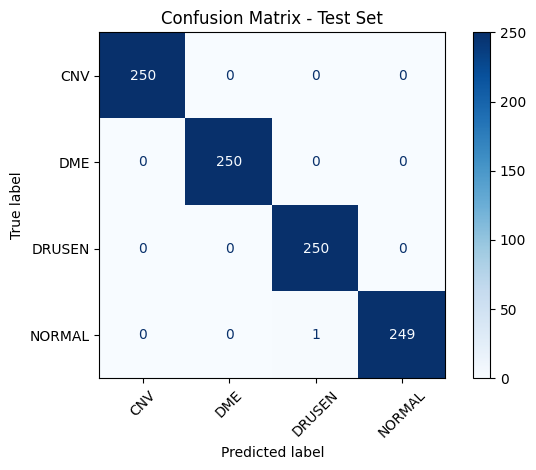

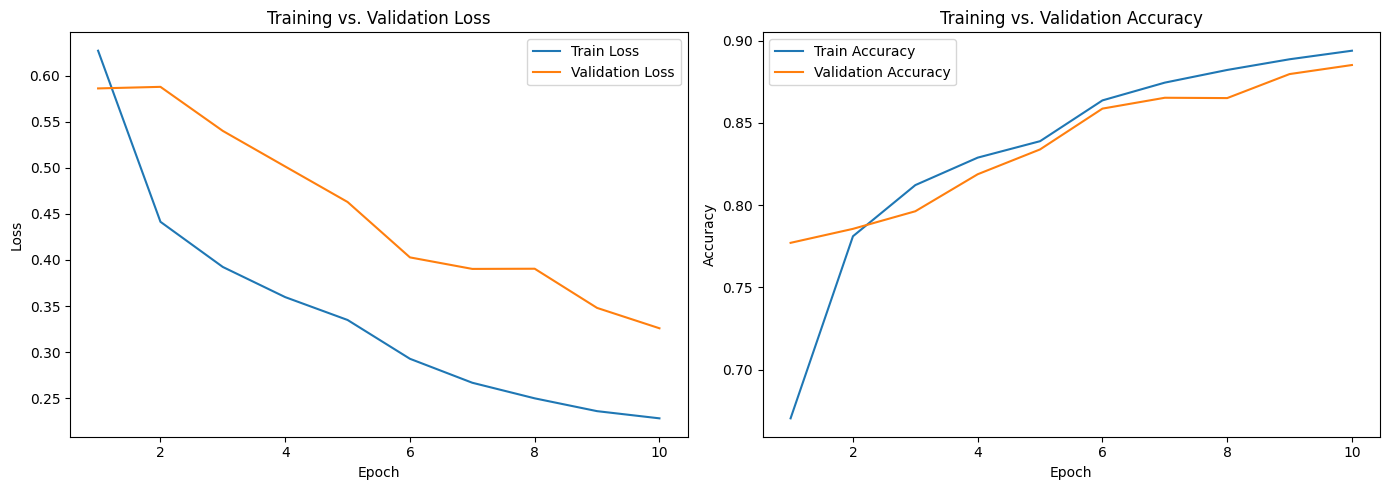

In [33]:
import torch
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate model on test set
net.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_acc = accuracy_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds, average='weighted')

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=train_dataset.classes))

cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

# Metric curves over training
epochs = list(range(1, 11))
train_losses = [0.6270, 0.4414, 0.3924, 0.3597, 0.3349, 0.2928, 0.2668, 0.2499, 0.2360, 0.2282]
val_losses = [0.5861, 0.5878, 0.5400, 0.5014, 0.4629, 0.4028, 0.3903, 0.3905, 0.3480, 0.3259]
train_accuracies = [0.6704, 0.7811, 0.8122, 0.8289, 0.8389, 0.8637, 0.8745, 0.8822, 0.8887, 0.8939]
val_accuracies = [0.7771, 0.7856, 0.7963, 0.8188, 0.8339, 0.8587, 0.8653, 0.8651, 0.8797, 0.8852]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs, train_losses, label="Train Loss")
ax1.plot(epochs, val_losses, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training vs. Validation Loss")
ax1.legend()

ax2.plot(epochs, train_accuracies, label="Train Accuracy")
ax2.plot(epochs, val_accuracies, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training vs. Validation Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()


## Loading and Preparing ResNet18

We load a pre-trained ResNet18 model and modify its final fully connected layer to match our 4-class classification task. The model is then moved to the available device (GPU if available, otherwise CPU). Cross-entropy loss is used for optimization, and the Adam optimizer is selected with an initial learning rate of 0.001.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

# Load pre-trained ResNet18
net = models.resnet18(pretrained=True)

# Modify the final layer to match number of classes
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 4)  # 4 classes

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently on device: {device}")
net = net.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

/home/undergrad/2025/eagojo/RetinaNet/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/undergrad/2025/eagojo/RetinaNet/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Currently on device: cuda


## Training ResNet18 for 50 Epochs

The model is trained for 50 epochs using the training set. We record the training and validation loss and accuracy at each epoch to monitor learning progress and detect overfitting or underfitting trends.


In [41]:
num_epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0
    train_preds = []
    train_labels = []
    
    
    # Training phase
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

        # Print progress every 50 batches
        if i % 50 == 0:
            print(f"[Epoch {epoch+1}] Processed batch {i+1}/{len(train_loader)}", end='\r')


    # Calculate training loss, accuracy, and F1 score for the epoch
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_f1 = f1_score(train_labels, train_preds, average='weighted')

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    net.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate validation loss, accuracy, and F1 score for the epoch
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    # Print metrics after each epoch
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Train F1: {train_f1:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")

# Save the trained model
torch.save(net.state_dict(), "Trained_ResNet18.pt")
print("✅ Training complete — final model saved to Trained_ResNet18.pt")


[Epoch 1] Processed batch 2301/2349
Epoch 1/50
Train Loss: 0.1788 | Train Acc: 0.9404 | Train F1: 0.9404
Val Loss: 0.1849 | Val Acc: 0.9379 | Val F1: 0.9393
[Epoch 2] Processed batch 2301/2349
Epoch 2/50
Train Loss: 0.1581 | Train Acc: 0.9477 | Train F1: 0.9477
Val Loss: 0.1941 | Val Acc: 0.9426 | Val F1: 0.9448
[Epoch 3] Processed batch 2301/2349
Epoch 3/50
Train Loss: 0.1471 | Train Acc: 0.9500 | Train F1: 0.9501
Val Loss: 0.1557 | Val Acc: 0.9532 | Val F1: 0.9537
[Epoch 4] Processed batch 2301/2349
Epoch 4/50
Train Loss: 0.1339 | Train Acc: 0.9554 | Train F1: 0.9554
Val Loss: 0.1159 | Val Acc: 0.9624 | Val F1: 0.9629
[Epoch 5] Processed batch 2301/2349
Epoch 5/50
Train Loss: 0.1244 | Train Acc: 0.9582 | Train F1: 0.9582
Val Loss: 0.1901 | Val Acc: 0.9414 | Val F1: 0.9431
[Epoch 6] Processed batch 2301/2349
Epoch 6/50
Train Loss: 0.1207 | Train Acc: 0.9589 | Train F1: 0.9590
Val Loss: 0.1297 | Val Acc: 0.9603 | Val F1: 0.9601
[Epoch 7] Processed batch 2301/2349
Epoch 7/50
Train Loss:

## Model Evaluation

After completing training, the final model was loaded and evaluated on the test set. The following steps were performed:
- Test accuracy, F1 score, and classification report generation
- Confusion matrix visualization
- Plotting training vs. validation loss and accuracy curves

---


/tmp/ipykernel_2132145/1619932456.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("Trained_ResNet18.pt"))


Test Accuracy: 0.9980
Test F1 Score: 0.9980

Classification Report:
              precision    recall  f1-score   support

         CNV       0.99      1.00      1.00       250
         DME       1.00      1.00      1.00       250
      DRUSEN       1.00      0.99      1.00       250
      NORMAL       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



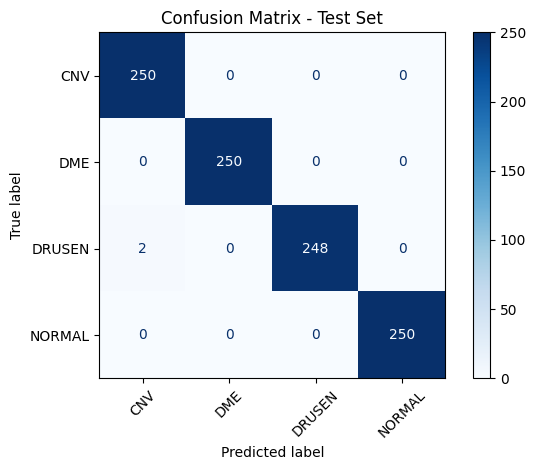

NameError: name 'train_losses' is not defined

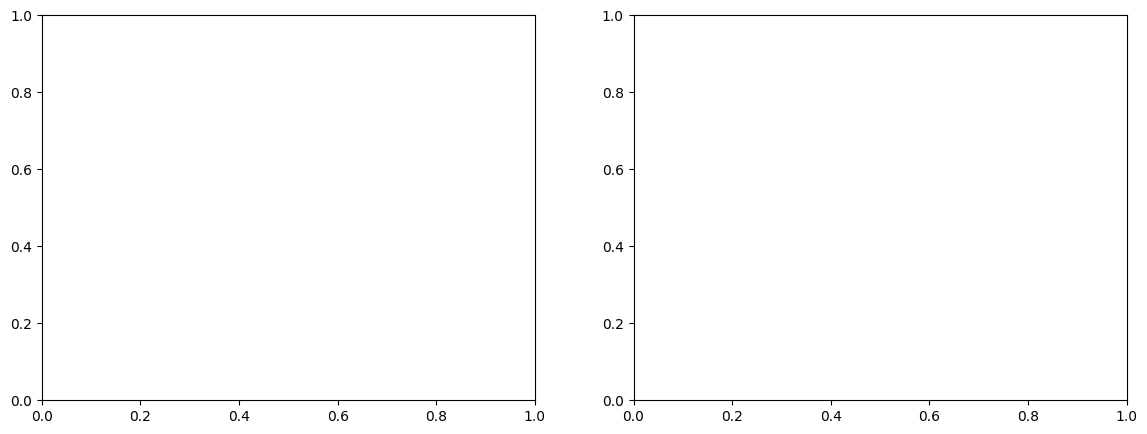

In [11]:
import torch
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the trained model
net.load_state_dict(torch.load("Trained_ResNet18.pt"))
net.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_acc = accuracy_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds, average='weighted')

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=train_dataset.classes))

cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

# --------------- Stage: Plot Training vs. Validation Curves ---------------

epochs = list(range(1, num_epochs + 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs, train_losses, label="Train Loss")
ax1.plot(epochs, val_losses, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training vs. Validation Loss")
ax1.legend()

ax2.plot(epochs, train_accuracies, label="Train Accuracy")
ax2.plot(epochs, val_accuracies, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training vs. Validation Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()
